In [1]:
import findspark
findspark.init()

In [2]:
import pandas as pd
import pyspark
from pyspark.context import SparkContext
from pyspark.sql import SparkSession

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()
print(sc.version)
print(spark.version)

2.4.8
2.4.8


In [5]:
from IPython.core.display import display, HTML

In [6]:
display(HTML("<style>.container { width:90% !important; }</style>"))

In [7]:
%%time
dirPath = ""
book_tags = "book_tags.csv"

Wall time: 0 ns


In [8]:
%%time
dirPath = ""
books = "books.csv"

Wall time: 0 ns


In [9]:
%%time
dirPath = ""
ratings = "ratings.csv"

Wall time: 0 ns


In [10]:
%%time
dirPath = ""
to_read = "to_read.csv"

Wall time: 0 ns


In [11]:
%%time
dirPath = ""
tags= "tags.csv"

Wall time: 0 ns


In [12]:
book_tags_df = spark.read.format("csv").option("header", "true").option("mode", "DROPMALFORMED").option("delimiter", ",").option("ignoreLeadingWhiteSpace","true").option("ignoreTrailingWhiteSpace","true").option("inferschema","true").load(dirPath + book_tags)
books_df = spark.read.format("csv").option("header", "true").option("mode", "DROPMALFORMED").option("delimiter", ",").option("ignoreLeadingWhiteSpace","true").option("ignoreTrailingWhiteSpace","true").option("inferschema","true").load(dirPath + books)
ratings_df = spark.read.format("csv").option("header", "true").option("mode", "DROPMALFORMED").option("delimiter", ",").option("ignoreLeadingWhiteSpace","true").option("ignoreTrailingWhiteSpace","true").option("inferschema","true").load(dirPath + ratings)
to_read_df = spark.read.format("csv").option("header", "true").option("mode", "DROPMALFORMED").option("delimiter", ",").option("ignoreLeadingWhiteSpace","true").option("ignoreTrailingWhiteSpace","true").option("inferschema","true").load(dirPath + to_read)
tags_df = spark.read.format("csv").option("header", "true").option("mode", "DROPMALFORMED").option("delimiter", ",").option("ignoreLeadingWhiteSpace","true").option("ignoreTrailingWhiteSpace","true").option("inferschema","true").load(dirPath + tags)

In [14]:
books_df.show(3)
books_df.printSchema()


+---+-------+------------+-------+-----------+---------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------+--------------------+
| id|book_id|best_book_id|work_id|books_count|     isbn|          isbn13|             authors|original_publication_year|      original_title|               title|language_code|average_rating|ratings_count|work_ratings_count|work_text_reviews_count|ratings_1|ratings_2|ratings_3|ratings_4|ratings_5|           image_url|     small_image_url|
+---+-------+------------+-------+-----------+---------+----------------+--------------------+-------------------------+--------------------+--------------------+-------------+--------------+-------------+------------------+-----------------------+---------+---------+---------+---------+---------+--------------------

In [15]:
ratings_df.show(3)
ratings_df.printSchema()


+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
|      1|    588|     5|
+-------+-------+------+
only showing top 3 rows

root
 |-- book_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)



In [16]:
to_read_df.show(10)

+-------+-------+
|user_id|book_id|
+-------+-------+
|      1|    112|
|      1|    235|
|      1|    533|
|      1|   1198|
|      1|   1874|
|      1|   2058|
|      1|   3334|
|      2|      4|
|      2|     11|
|      2|     13|
+-------+-------+
only showing top 10 rows



In [14]:
###Reading the Parquet File

In [17]:
%%time
dirPath = ""
fileName = "book_tags.csv.gz.parquet"
book_tags_df.repartition(8).write.mode('overwrite').parquet(dirPath + fileName)

Wall time: 4.16 s


In [18]:
dirPath = ''
fileName = 'book_tags.csv.gz.parquet'
book_tags_df = spark.read.parquet(dirPath + fileName)

In [19]:
%%time
dirPath = ""
fileName1 = "books.csv.gz.parquet"
books_df.repartition(8).write.mode('overwrite').parquet(dirPath + fileName1)

Wall time: 1.47 s


In [20]:
dirPath = ''
fileName1 = 'books.csv.gz.parquet'
books_df = spark.read.parquet(dirPath + fileName1)


In [21]:
%%time
dirPath = ""
fileName2 = "ratings.csv.gz.parquet"

Wall time: 0 ns


In [22]:
dirPath = ''
fileName2 = 'ratings.csv.gz.parquet'
ratings_df = spark.read.parquet(dirPath + fileName2)

In [23]:
%%time
dirPath = ""
fileName3 = "to_read.csv.gz.parquet"
to_read_df.repartition(8).write.mode('overwrite').parquet(dirPath + fileName3)

Wall time: 2.33 s


In [24]:
dirPath = ''
fileName3 = 'to_read.csv.gz.parquet'
to_read_df = spark.read.parquet(dirPath + fileName3)

In [25]:
%%time
dirPath = ""
fileName4 = "tags.csv.gz.parquet"
tags_df.repartition(8).write.mode('overwrite').parquet(dirPath + fileName4)

Wall time: 957 ms


In [26]:
dirPath = ''
fileName4 = 'tags.csv.gz.parquet'
tags_df = spark.read.parquet(dirPath + fileName4)

In [ ]:
#####Counting entries

In [28]:
books_df.printSchema()
(print(books_df.count()))

root
 |-- id: integer (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- best_book_id: integer (nullable = true)
 |-- work_id: integer (nullable = true)
 |-- books_count: integer (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: double (nullable = true)
 |-- authors: string (nullable = true)
 |-- original_publication_year: double (nullable = true)
 |-- original_title: string (nullable = true)
 |-- title: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- ratings_count: string (nullable = true)
 |-- work_ratings_count: string (nullable = true)
 |-- work_text_reviews_count: string (nullable = true)
 |-- ratings_1: double (nullable = true)
 |-- ratings_2: integer (nullable = true)
 |-- ratings_3: integer (nullable = true)
 |-- ratings_4: integer (nullable = true)
 |-- ratings_5: integer (nullable = true)
 |-- image_url: string (nullable = true)
 |-- small_image_url: string (nullable = true)


In [29]:
ratings_df.printSchema()
print(ratings_df.count())

root
 |-- book_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)

981756


In [24]:
#####Analysis

+------+------+
|rating| count|
+------+------+
|     5|292961|
|     4|357366|
|     3|248623|
|     2| 63231|
|     1| 19575|
+------+------+



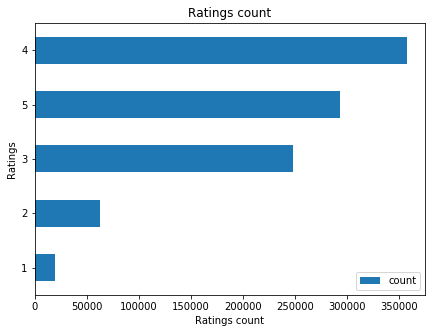

In [31]:
rating = ratings_df.groupby('rating').count().orderBy('rating', ascending=False).show()
ratings_df.groupBy('rating').count().sort('count').toPandas()[-15:].plot(kind='barh', x='rating', figsize=(7, 5))
plt.xlabel('Ratings count')
plt.ylabel('Ratings')
plt.title('Ratings count')
plt.show()

+--------------+-----+
|average_rating|count|
+--------------+-----+
|          4.82|    1|
|          4.77|    2|
|          4.76|    2|
|          4.75|    1|
|          4.74|    2|
|          4.73|    3|
|          4.72|    2|
|          4.71|    3|
|          4.68|    1|
|          4.67|    2|
|          4.66|    3|
|          4.65|    3|
|          4.64|    1|
|          4.63|    6|
|          4.62|    2|
|          4.61|    7|
|           4.6|    4|
|          4.59|    9|
|          4.58|    7|
|          4.57|    8|
+--------------+-----+
only showing top 20 rows



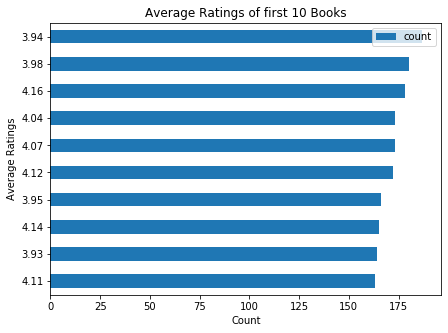

In [32]:
avg_rating = books_df.groupby('average_rating').count().orderBy('average_rating', ascending=False).show()
books_df.groupBy('average_rating').count().sort('count').toPandas()[-10:].plot(kind='barh', x='average_rating', figsize=(7, 5))
plt.xlabel('Count')
plt.ylabel("Average Ratings")
plt.title('Average Ratings of first 10 Books')
plt.show()

In [33]:
#######Analyzing numerical data
numerical_stat = [t[0] for t in books_df.dtypes if t[1] == 'int']
books_df.select(numerical_stat).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
id,9998,4999.915283056612,2886.825995314341,1,10000
book_id,9998,5265637.776955391,7575926.291650844,1,33288638
best_book_id,9998,5472196.1555311065,7827803.564865626,1,35534230
work_id,9998,8647803.417483497,1.1751677303448351E7,87,56399597
books_count,9998,75.7245449089818,170.48566845518852,1,3455
ratings_2,9998,3111.385877175435,9718.030457809971,30,436802
ratings_3,9998,11477.69373874775,28549.017813834904,323,793319
ratings_4,9998,19968.72324464893,51452.051190058715,750,1481305
ratings_5,9998,23793.262652530506,79776.48402046453,754,3011543


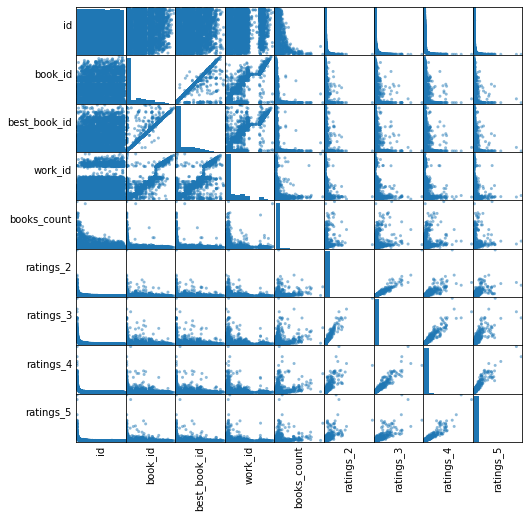

In [34]:
num_data = books_df.select(numerical_stat).toPandas()
axs = pd.plotting.scatter_matrix(num_data, figsize=(8, 8));
n = len(num_data.columns)
for i in range(n):
 v = axs[i, 0]
 v.yaxis.label.set_rotation(0)
 v.yaxis.label.set_ha('right')
 v.set_yticks(())
 h = axs[n-1, i]
 h.xaxis.label.set_rotation(90)
 h.set_xticks(())

In [35]:
###Counting number of unique authors
Authors = books_df.select('authors').distinct().count()
Authors

4663

In [36]:
from pyspark.sql.functions import *
bookyear = books_df.filter(col("original_publication_year") > 2000).count()
print(bookyear)

5978


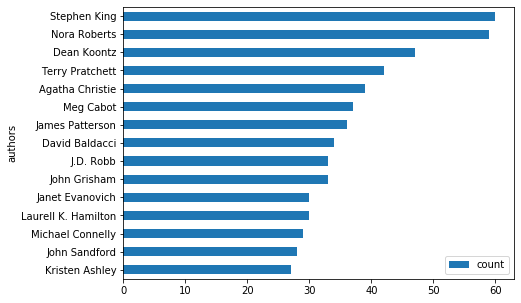

In [37]:
books_df.groupBy('authors').count().sort('count').toPandas()[-15:].plot(kind='barh', x='authors', figsize=(7, 5))

In [61]:
######ALS Model

In [62]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [63]:
# core
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
import random, os
# spark & ML
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator

In [64]:
# create spark session
spark = SparkSession.builder.appName('recsys').getOrCreate()

In [65]:
ratings_df.printSchema()
ratings_df.show(n=2)

root
 |-- book_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|   1095|  46031|     5|
|   1090|  24683|     5|
+-------+-------+------+
only showing top 2 rows



In [66]:
training_df,validation_df = ratings_df.randomSplit([.8,0.2])

In [67]:
iterations = 10
regularisation_para = 0.1
rank=4
errors = []
err=0

In [68]:
als  = ALS(maxIter=iterations,regParam=regularisation_para,rank=3,userCol="user_id",itemCol="book_id",ratingCol="rating")
model = als.fit(training_df)

In [69]:
predict = model.transform(validation_df)
new_predict = predict.filter(col("prediction")!= np.nan)
evalutor = RegressionEvaluator(metricName="rmse",labelCol="rating",predictionCol="prediction")

rmse_score = evalutor.evaluate(new_predict)
print("Root Mean Square Errr Value :",str(rmse_score))

Root Mean Square Errr Value : 0.8939722665767909


In [76]:
predict.join(books_df,"book_id").select("user_id","title","prediction").show(10)


+-------+----------+----------+
|user_id|     title|prediction|
+-------+----------+----------+
|   6213|Lysistrata| 3.0613024|
|   6460|Lysistrata|  4.147941|
|  12761|Lysistrata|  4.583121|
|  40418|Lysistrata| 3.3226442|
|  41249|Lysistrata|  4.150096|
|  25214|Lysistrata| 4.3217525|
|  24396|Lysistrata| 3.5661945|
|  41926|Lysistrata|  4.095018|
|  37363|Lysistrata|  4.108109|
|  43300|Lysistrata| 4.1805725|
+-------+----------+----------+
only showing top 10 rows



In [77]:
user = predict.filter(col("user_id")== 24396).join(books_df,"book_id").select("user_id","title",'image_url','prediction')
user.count()

4

In [78]:
user.show()

+-------+------------------+--------------------+----------+
|user_id|             title|           image_url|prediction|
+-------+------------------+--------------------+----------+
|  24396|        Lysistrata|https://images.gr...| 3.5661945|
|  24396|All the King's Men|https://images.gr...| 3.6486878|
|  24396|    Atlas Shrugged|https://images.gr...|  3.629018|
|  24396|  The Great Gatsby|https://images.gr...| 3.2954454|
+-------+------------------+--------------------+----------+



In [80]:
###Printing Specific user Recommendations.
print("Recommnedations by ALS algorithm \n for user_id:12466\n\n")
for book in user.take(4):
  print(book.title)

Recommnedations by ALS algorithm 
 for user_id:12466


Lysistrata
All the King's Men
Atlas Shrugged
The Great Gatsby
